In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon

In [2]:
df = pd.read_csv('Housing_Maintenance_Code_Violations_20231206.csv')

/var/folders/m9/vz1tzq8j7rldj2225vbbzpfh0000gn/T/ipykernel_78065/1998241858.py:1: DtypeWarning: Columns (10,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Housing_Maintenance_Code_Violations_20231206.csv')


In [3]:
df.head()

,ViolationID,BuildingID,RegistrationID,BoroID,Borough,HouseNumber,LowHouseNumber,HighHouseNumber,StreetName,StreetCode,...,ViolationStatus,RentImpairing,Latitude,Longitude,CommunityBoard,CouncilDistrict,CensusTract,BIN,BBL,NTA
0,10034143,629900,400688,4,QUEENS,77-54,77-44,77-54,AUSTIN STREET,28990,...,Close,N,40.714368,-73.835218,6.0,29.0,76901.0,4079660.0,4.033340e+09,Forest Hills
1,10034171,629900,400688,4,QUEENS,77-54,77-44,77-54,AUSTIN STREET,28990,...,Close,N,40.714368,-73.835218,6.0,29.0,76901.0,4079660.0,4.033340e+09,Forest Hills
2,10797937,94244,203084,2,BRONX,2136,2136,2136,MAPES AVENUE,49120,...,Close,N,40.847751,-73.884561,6.0,15.0,36501.0,2013000.0,2.031110e+09,East Tremont
3,10018078,879456,0,5,STATEN ISLAND,129,129,129,SENECA STREET,47450,...,Close,N,40.631619,-74.117918,1.0,49.0,125.0,5147984.0,5.002160e+09,West New Brighton-New Brighton-St. George
4,10018080,879456,0,5,STATEN ISLAND,129,129,129,SENECA STREET,47450,...,Close,N,40.631619,-74.117918,1.0,49.0,125.0,5147984.0,5.002160e+09,West New Brighton-New Brighton-St. George


In [4]:
df.tail()

,ViolationID,BuildingID,RegistrationID,BoroID,Borough,HouseNumber,LowHouseNumber,HighHouseNumber,StreetName,StreetCode,...,ViolationStatus,RentImpairing,Latitude,Longitude,CommunityBoard,CouncilDistrict,CensusTract,BIN,BBL,NTA
8631980,9578786,101364,213121,2,BRONX,4683,4683,4683,PARK AVENUE,56820,...,Close,N,40.858699,-73.892513,6.0,15.0,38304.0,2011229.0,2.030320e+09,Belmont
8631981,9606919,101364,213121,2,BRONX,4683,4683,4683,PARK AVENUE,56820,...,Close,Y,40.858699,-73.892513,6.0,15.0,38304.0,2011229.0,2.030320e+09,Belmont
8631982,9878978,101364,213121,2,BRONX,4683,4683,4683,PARK AVENUE,56820,...,Close,N,40.858699,-73.892513,6.0,15.0,38304.0,2011229.0,2.030320e+09,Belmont
8631983,9993101,101364,213121,2,BRONX,4683,4683,4683,PARK AVENUE,56820,...,Close,N,40.858699,-73.892513,6.0,15.0,38304.0,2011229.0,2.030320e+09,Belmont
8631984,9999086,101364,213121,2,BRONX,4683,4683,4683,PARK AVENUE,56820,...,Close,N,40.858699,-73.892513,6.0,15.0,38304.0,2011229.0,2.030320e+09,Belmont


In [5]:
# column types
df.dtypes

ViolationID                int64
BuildingID                 int64
RegistrationID             int64
BoroID                     int64
Borough                   object
HouseNumber               object
LowHouseNumber            object
HighHouseNumber           object
StreetName                object
StreetCode                 int64
Postcode                  object
Apartment                 object
Story                     object
Block                      int64
Lot                        int64
Class                     object
InspectionDate            object
ApprovedDate              object
OriginalCertifyByDate     object
OriginalCorrectByDate     object
NewCertifyByDate          object
NewCorrectByDate          object
CertifiedDate             object
OrderNumber               object
NOVID                    float64
NOVDescription            object
NOVIssuedDate             object
CurrentStatusID            int64
CurrentStatus             object
CurrentStatusDate         object
NovType   

In [6]:
# convert column to a datetype - InspectionDate, ApprovedDate, 
# OriginalCertifyByDate, OriginalCorrectByDate, CertifiedDate, 
# NOVIssuedDate, CurrentStatus
    # could be done by a for loop
df['InspectionDate'] = pd.to_datetime(df['InspectionDate'],errors = 'coerce', format='%B %d, %Y')
df['ApprovedDate'] = pd.to_datetime(df['ApprovedDate'],errors = 'coerce', format='%B %d, %Y')
df['OriginalCertifyByDate'] = pd.to_datetime(df['OriginalCertifyByDate'],errors = 'coerce', format='%B %d, %Y')
df['OriginalCorrectByDate'] = pd.to_datetime(df['OriginalCorrectByDate'],errors = 'coerce', format='%B %d, %Y')
df['NewCertifyByDate'] = pd.to_datetime(df['NewCertifyByDate'],errors = 'coerce', format='%B %d, %Y')
df['NewCorrectByDate'] = pd.to_datetime(df['NewCorrectByDate'],errors = 'coerce', format='%B %d, %Y')
df['CertifiedDate'] = pd.to_datetime(df['CertifiedDate'],errors = 'coerce', format='%B %d, %Y')
df['NOVIssuedDate'] = pd.to_datetime(df['NOVIssuedDate'],errors = 'coerce', format='%B %d, %Y')
df['CurrentStatusDate'] = pd.to_datetime(df['CurrentStatusDate'],errors = 'coerce', format='%B %d, %Y')

df.dtypes

ViolationID                       int64
BuildingID                        int64
RegistrationID                    int64
BoroID                            int64
Borough                          object
HouseNumber                      object
LowHouseNumber                   object
HighHouseNumber                  object
StreetName                       object
StreetCode                        int64
Postcode                         object
Apartment                        object
Story                            object
Block                             int64
Lot                               int64
Class                            object
InspectionDate           datetime64[ns]
ApprovedDate             datetime64[ns]
OriginalCertifyByDate    datetime64[ns]
OriginalCorrectByDate    datetime64[ns]
NewCertifyByDate         datetime64[ns]
NewCorrectByDate         datetime64[ns]
CertifiedDate            datetime64[ns]
OrderNumber                      object
NOVID                           float64


In [7]:
# check what the date looks like
df['InspectionDate']

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
           ..
8631980   NaT
8631981   NaT
8631982   NaT
8631983   NaT
8631984   NaT
Name: InspectionDate, Length: 8631985, dtype: datetime64[ns]

In [8]:
# organize database based on date time from most recent to least recent date
# descending order
df = df.sort_values(by=['InspectionDate', 'ApprovedDate', 'OriginalCertifyByDate', 'OriginalCorrectByDate',
                       'NewCertifyByDate', 'NewCorrectByDate','CertifiedDate', 'NOVIssuedDate', 'CurrentStatusDate'], ascending = False)

In [9]:
# check for missing values in the database
df.isnull().sum()

ViolationID                    0
BuildingID                     0
RegistrationID                 0
BoroID                         0
Borough                        0
HouseNumber                    0
LowHouseNumber              1450
HighHouseNumber                0
StreetName                     0
StreetCode                     0
Postcode                    6696
Apartment                2800249
Story                    1567135
Block                          0
Lot                            0
Class                          0
InspectionDate           8631985
ApprovedDate             8631985
OriginalCertifyByDate    8631985
OriginalCorrectByDate    8631985
NewCertifyByDate         8631985
NewCorrectByDate         8631985
CertifiedDate            8631985
OrderNumber                    0
NOVID                     673523
NOVDescription                20
NOVIssuedDate            8631985
CurrentStatusID                0
CurrentStatus                  0
CurrentStatusDate        8631985
NovType   

In [10]:
# DEBUG
#make copy of database from the last 2 years 
    # 2021-12-06 (6 December 2021) to 2023-12-06 (6 December 2023)
df2 = df.loc[(df['InspectionDate'] >= '2021-12-05') & (df['InspectionDate'] < '2023-12-05')]
    # individual year - debug !!
#df3 = df.loc[(df['InspectionDate'] >= "2021-12-05") & (df['InspectionDate' < '2022-12-05'])]
#df4 = df.loc[(df['InspectionDate'] >= "2022-12-05") & (df['InspectionDate' < '2023-12-05'])]

In [11]:
# CHECK TYPES ON THE DF2
df2.dtypes

ViolationID                       int64
BuildingID                        int64
RegistrationID                    int64
BoroID                            int64
Borough                          object
HouseNumber                      object
LowHouseNumber                   object
HighHouseNumber                  object
StreetName                       object
StreetCode                        int64
Postcode                         object
Apartment                        object
Story                            object
Block                             int64
Lot                               int64
Class                            object
InspectionDate           datetime64[ns]
ApprovedDate             datetime64[ns]
OriginalCertifyByDate    datetime64[ns]
OriginalCorrectByDate    datetime64[ns]
NewCertifyByDate         datetime64[ns]
NewCorrectByDate         datetime64[ns]
CertifiedDate            datetime64[ns]
OrderNumber                      object
NOVID                           float64


In [26]:
    # DONT RUN - debugging
# number changes - Block, Lot, OrderNumber, NOVID, CurrentStatusID,
# CommunityBoard, CouncilDistrict, CensusTract, BIN, BBL 

        # DEBUG
df2[['Block', 'Lot', 'OrderNumber', 'NOVID', 'CurrentStatusID',
   'CommunityBoard', 'CouncilDistrict', 'CensusTract','BIN','BBL']] = df[['Block', 'Lot', 'OrderNumber', 'NOVID', 'CurrentStatusID',
   'CommunityBoard', 'CouncilDistrict', 'CensusTract','BIN','BBL']].astype(str).astype(int)
df2

ValueError: invalid literal for int() with base 10: '081B'

In [12]:
# DEBUG - check for missing values in df2
df2.isnull().sum() 
# no missing values

ViolationID              0.0
BuildingID               0.0
RegistrationID           0.0
BoroID                   0.0
Borough                  0.0
HouseNumber              0.0
LowHouseNumber           0.0
HighHouseNumber          0.0
StreetName               0.0
StreetCode               0.0
Postcode                 0.0
Apartment                0.0
Story                    0.0
Block                    0.0
Lot                      0.0
Class                    0.0
InspectionDate           0.0
ApprovedDate             0.0
OriginalCertifyByDate    0.0
OriginalCorrectByDate    0.0
NewCertifyByDate         0.0
NewCorrectByDate         0.0
CertifiedDate            0.0
OrderNumber              0.0
NOVID                    0.0
NOVDescription           0.0
NOVIssuedDate            0.0
CurrentStatusID          0.0
CurrentStatus            0.0
CurrentStatusDate        0.0
NovType                  0.0
ViolationStatus          0.0
RentImpairing            0.0
Latitude                 0.0
Longitude     

In [13]:
# remove columns LowHouseNumber, HighHouseNumber
columns = ['LowHouseNumber', 'HighHouseNumber']
df2 = df.drop(columns = columns)
df2.dtypes

ViolationID                       int64
BuildingID                        int64
RegistrationID                    int64
BoroID                            int64
Borough                          object
HouseNumber                      object
StreetName                       object
StreetCode                        int64
Postcode                         object
Apartment                        object
Story                            object
Block                             int64
Lot                               int64
Class                            object
InspectionDate           datetime64[ns]
ApprovedDate             datetime64[ns]
OriginalCertifyByDate    datetime64[ns]
OriginalCorrectByDate    datetime64[ns]
NewCertifyByDate         datetime64[ns]
NewCorrectByDate         datetime64[ns]
CertifiedDate            datetime64[ns]
OrderNumber                      object
NOVID                           float64
NOVDescription                   object
NOVIssuedDate            datetime64[ns]


In [23]:
    # DONT RUN
# string changes - Borough, StreetName, Class, NOVDescription, NTA,
# CurrentStatus, NovType, ViolationStatus, RentImpairing, CommunityBoard,
    # so don't need to do this
df2[['Borough', 'StreetName', 'Class', 'NOVDescription', 'NTA',
                'CurrentStatus', 'NovType', 'ViolationStatus', 'RentImpairing',
                'CommunityBoard']] = df[['Borough', 'StreetName', 'Class', 'NOVDescription', 'NTA',
                'CurrentStatus', 'NovType', 'ViolationStatus', 'RentImpairing',
                'CommunityBoard']].astype(str)
df2.dtypes

ViolationID                     float64
BuildingID                      float64
RegistrationID                  float64
BoroID                          float64
Borough                          object
HouseNumber                      object
LowHouseNumber                   object
HighHouseNumber                  object
StreetName                       object
StreetCode                      float64
Postcode                         object
Apartment                        object
Story                            object
Block                           float64
Lot                             float64
Class                            object
InspectionDate           datetime64[ns]
ApprovedDate             datetime64[ns]
OriginalCertifyByDate    datetime64[ns]
OriginalCorrectByDate    datetime64[ns]
NewCertifyByDate         datetime64[ns]
NewCorrectByDate         datetime64[ns]
CertifiedDate            datetime64[ns]
OrderNumber                      object
NOVID                           float64


In [ ]:
# borough to number match 
# Boro code (1 = Manhattan, 2 = Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island)

In [ ]:
# mean values for columns - 

In [14]:
df2.to_csv('HousingData_2021_2023.csv', index=False, encoding='utf-8')
#df3.to_csv('HousingData_2021_2022.csv', index=False, encoding = 'utf-8')
#df4.to_csv('HousingData_2022_2023.csv', index=False, encoding = 'utf-8')

Questions to ask:
1. Which boroughs do violations occur in the most overall?
2. Which neighborhood (NTA) has the most violations?
3. What day did the most violations occur?
4. Which class of violation occurs the most?
5. How many violations were rent impairing during [choose date]
6. Overtime, which building 

/var/folders/m9/vz1tzq8j7rldj2225vbbzpfh0000gn/T/ipykernel_78065/2329035886.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df2.corr()


<Axes: >

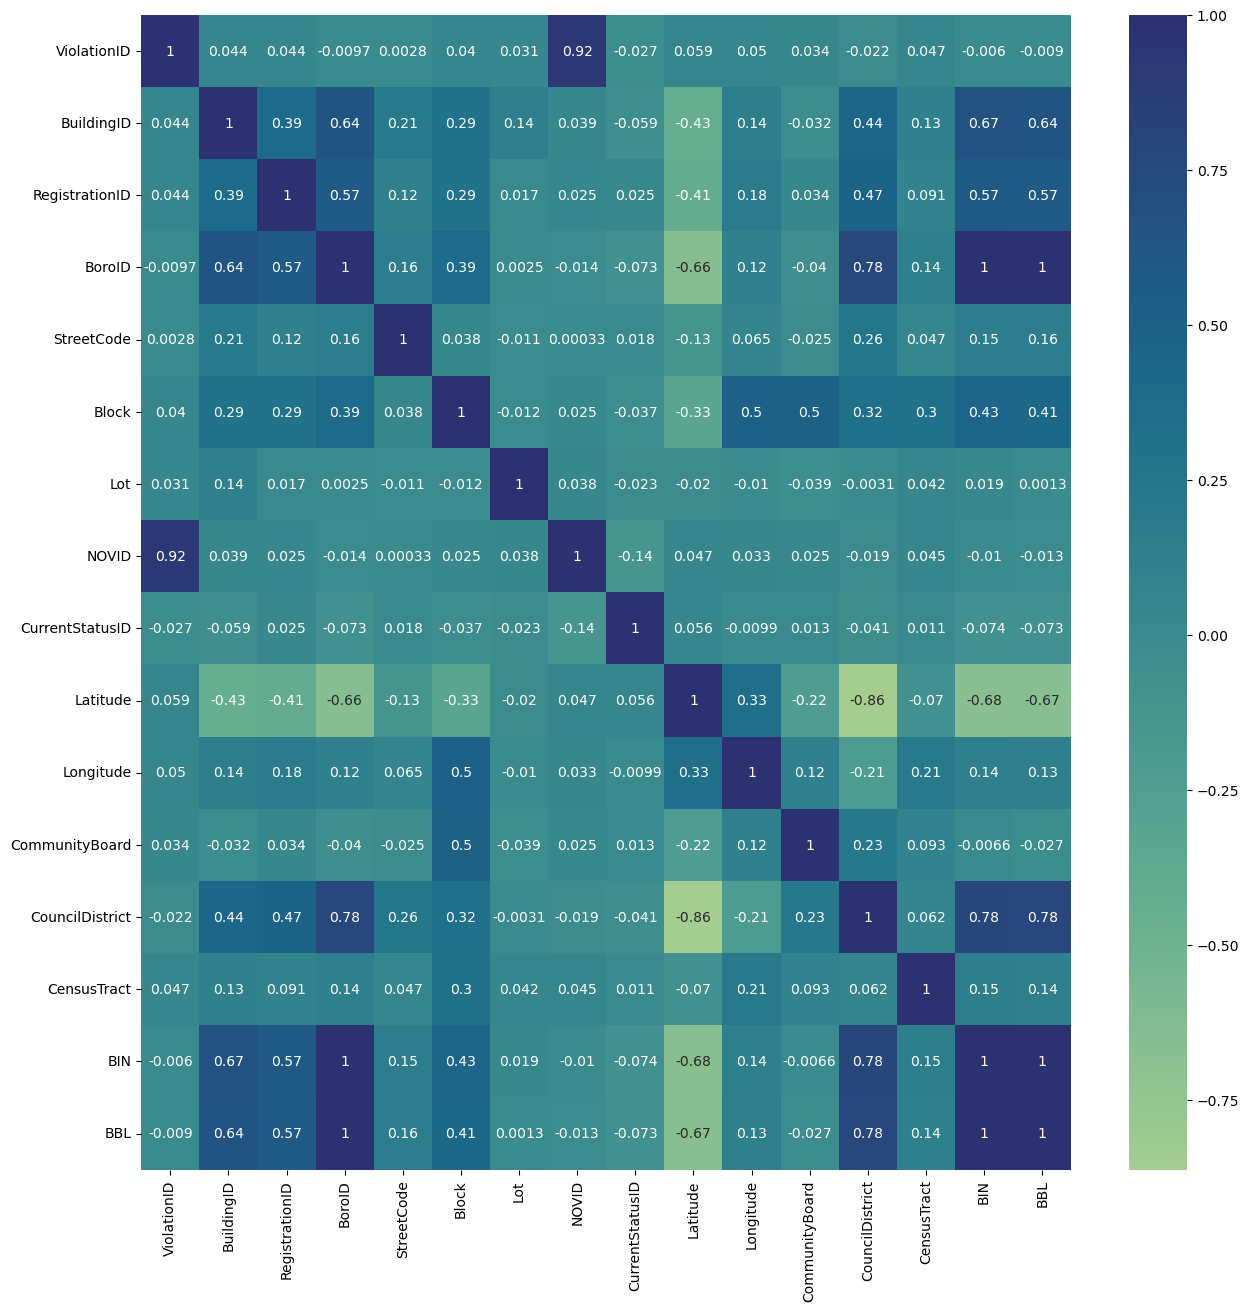

In [15]:
correlation = df2.corr()
# visualize correlation
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, cmap='crest')

In [16]:
# zip map importation
zipCode_map = gpd.read_file('nyu_2451_34509.shp')

<Axes: >

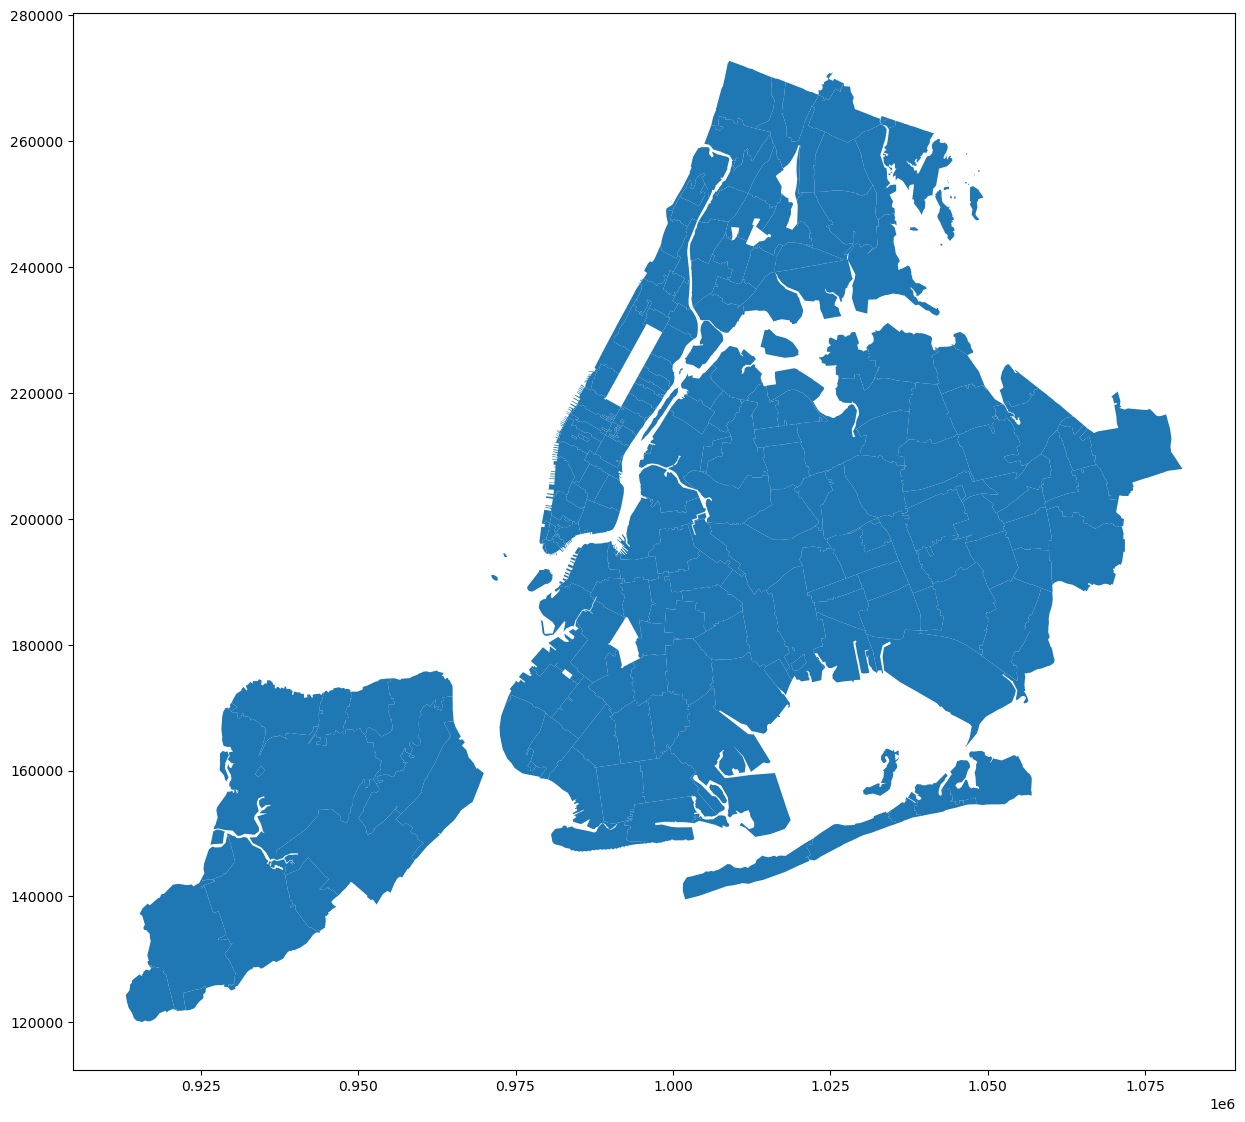

In [17]:
# plot of zip map
fig, ax = plt.subplots(figsize=(15,15))
zipCode_map.plot(ax=ax)

In [18]:
# get coordinate system
zipCode_map.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

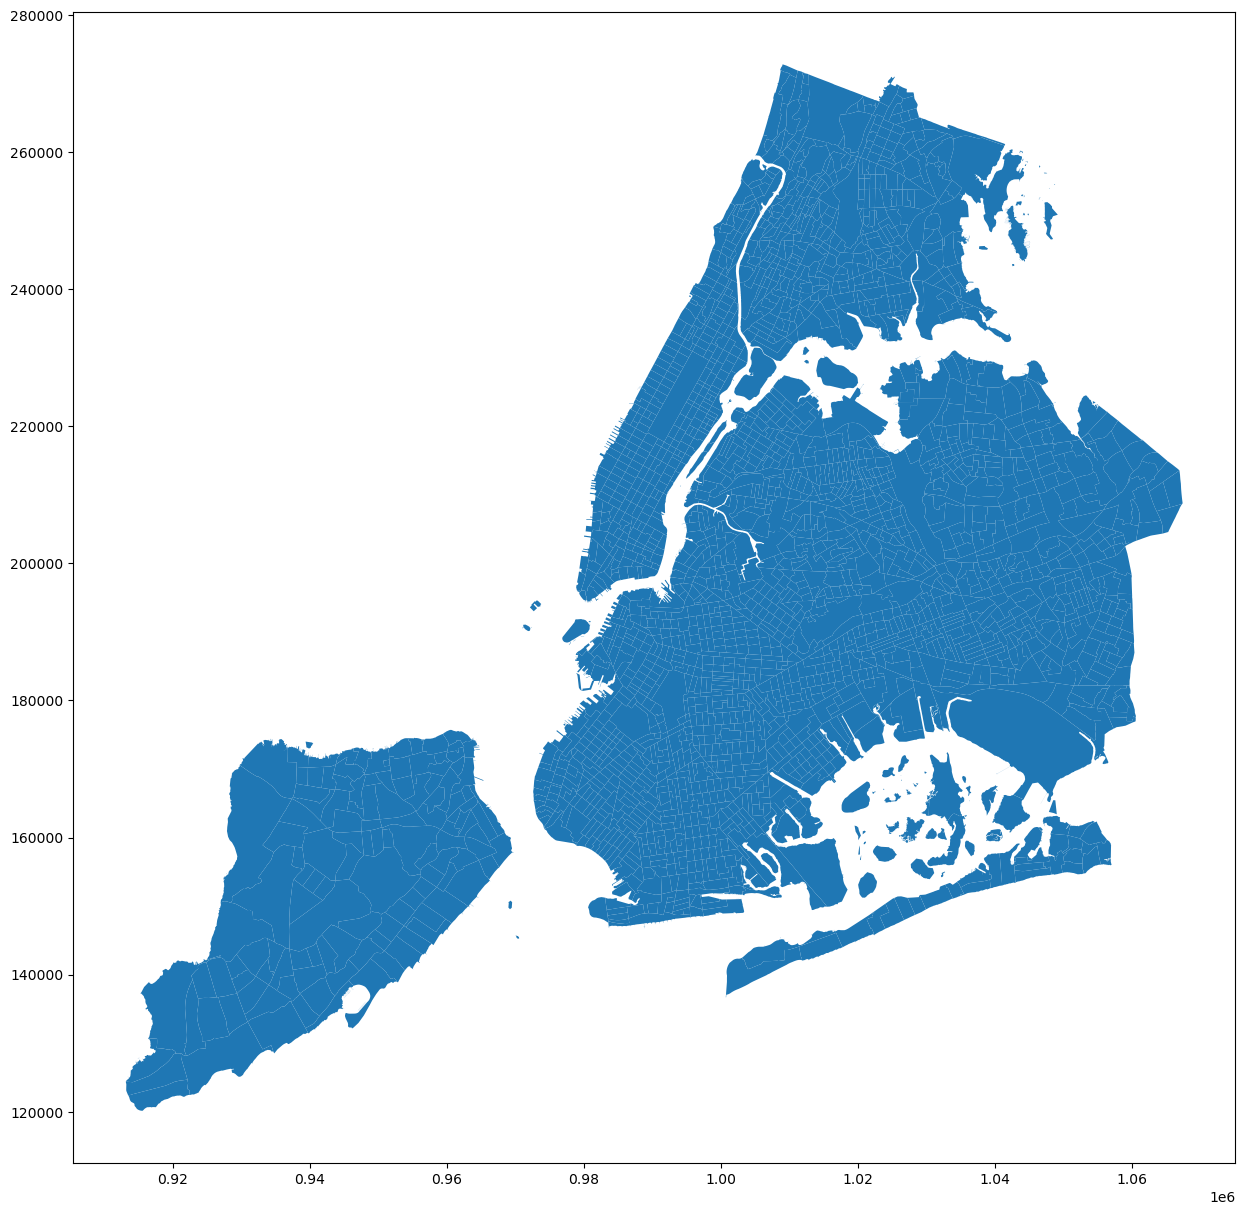

In [19]:
# census tract map
censusTract_map = gpd.read_file('nyct2020.shp')
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax)

In [20]:
# get coordinate system 
censusTract_map.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

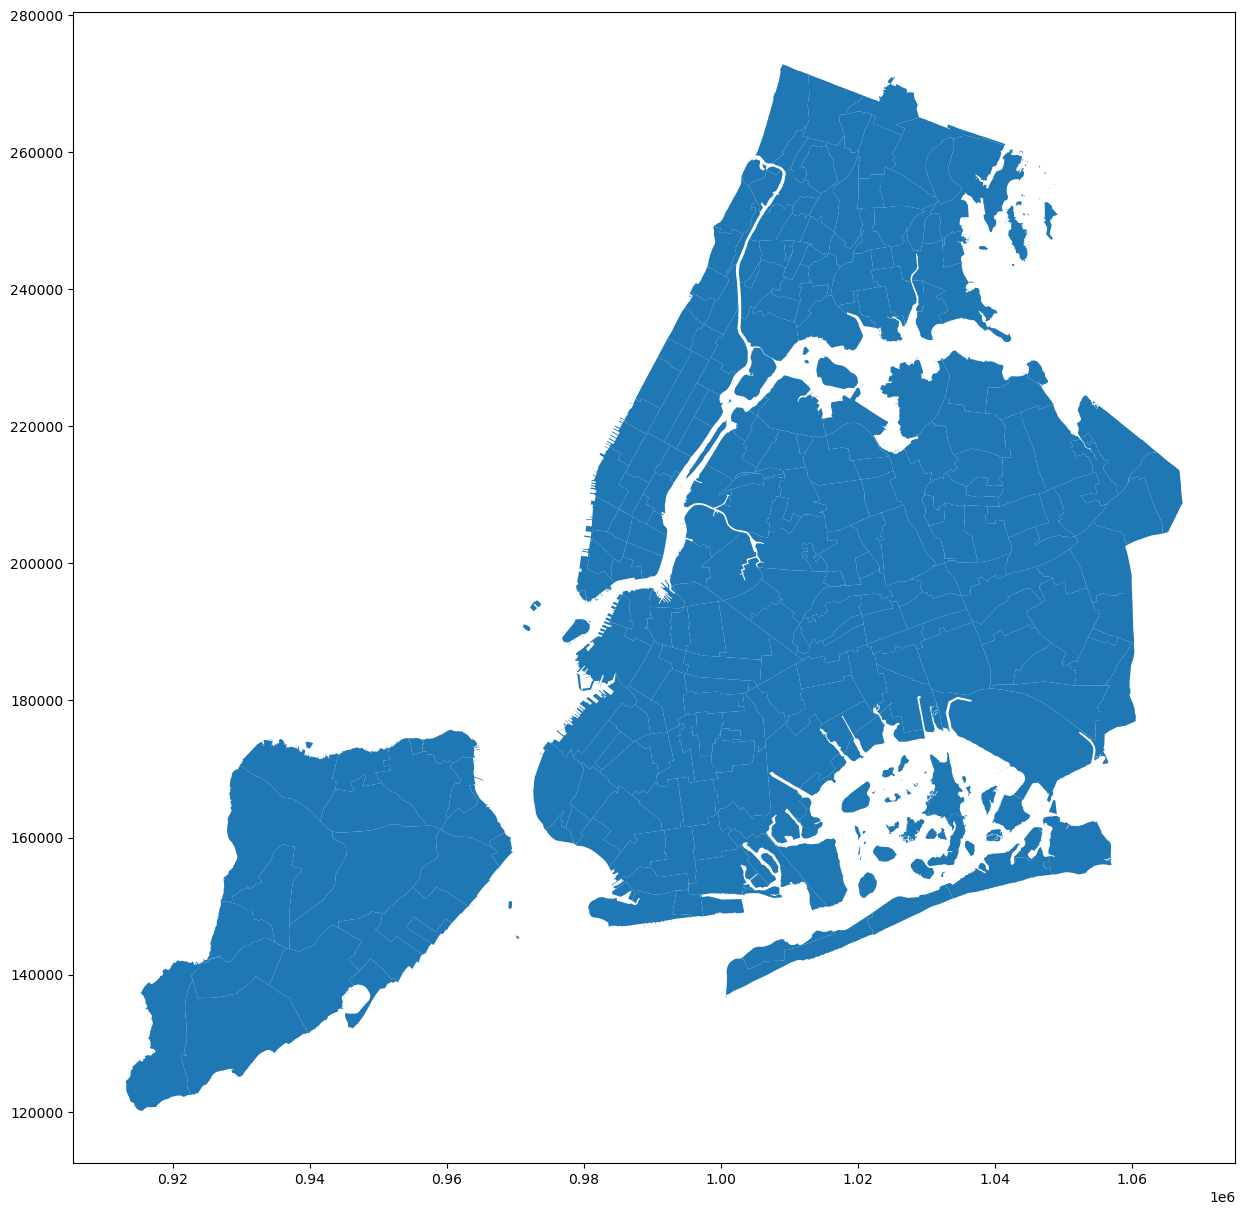

In [21]:
# NTA map
NTA_map = gpd.read_file('nynta2020.shp')
fig, ax = plt.subplots(figsize=(15,15))
NTA_map.plot(ax=ax)

In [22]:
# get coordinate system
NTA_map.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
# creation of geopandas dataframe
# designate coordinate system
# source: https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391
    #crs = {'init':'espg:2263'}
# zip x and y coordinates into single feature
    #geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]
# create GeoPandas dataframe
    #geo_df = gpd.GeoDataFrame(df2,
     #crs = crs,
     #geometry = geometry)
geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]
epsg=2263
geo_df = GeoDataFrame(df2,crs=epsg ,geometry=geometry)

In [23]:
# creation of geopandas dataframe
# source = https://stackoverflow.com/questions/38961816/geopandas-set-crs-on-points
geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]
geo_df = GeoDataFrame(df2, geometry=geometry)
geo_df.set_crs(epsg=2263, inplace=True)


,ViolationID,BuildingID,RegistrationID,BoroID,Borough,HouseNumber,StreetName,StreetCode,Postcode,Apartment,...,RentImpairing,Latitude,Longitude,CommunityBoard,CouncilDistrict,CensusTract,BIN,BBL,NTA,geometry
0,10034143,629900,400688,4,QUEENS,77-54,AUSTIN STREET,28990,11375.0,4A,...,N,40.714368,-73.835218,6.0,29.0,76901.0,4079660.0,4.033340e+09,Forest Hills,POINT (-73.835 40.714)
1,10034171,629900,400688,4,QUEENS,77-54,AUSTIN STREET,28990,11375.0,4A,...,N,40.714368,-73.835218,6.0,29.0,76901.0,4079660.0,4.033340e+09,Forest Hills,POINT (-73.835 40.714)
2,10797937,94244,203084,2,BRONX,2136,MAPES AVENUE,49120,10460.0,C4,...,N,40.847751,-73.884561,6.0,15.0,36501.0,2013000.0,2.031110e+09,East Tremont,POINT (-73.885 40.848)
3,10018078,879456,0,5,STATEN ISLAND,129,SENECA STREET,47450,10310.0,129,...,N,40.631619,-74.117918,1.0,49.0,125.0,5147984.0,5.002160e+09,West New Brighton-New Brighton-St. George,POINT (-74.118 40.632)
4,10018080,879456,0,5,STATEN ISLAND,129,SENECA STREET,47450,10310.0,129,...,N,40.631619,-74.117918,1.0,49.0,125.0,5147984.0,5.002160e+09,West New Brighton-New Brighton-St. George,POINT (-74.118 40.632)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631980,9578786,101364,213121,2,BRONX,4683,PARK AVENUE,56820,10458.0,NaN,...,N,40.858699,-73.892513,6.0,15.0,38304.0,2011229.0,2.030320e+09,Belmont,POINT (-73.893 40.859)
8631981,9606919,101364,213121,2,BRONX,4683,PARK AVENUE,56820,10458.0,NaN,...,Y,40.858699,-73.892513,6.0,15.0,38304.0,2011229.0,2.030320e+09,Belmont,POINT (-73.893 40.859)
8631982,9878978,101364,213121,2,BRONX,4683,PARK AVENUE,56820,10458.0,NaN,...,N,40.858699,-73.892513,6.0,15.0,38304.0,2011229.0,2.030320e+09,Belmont,POINT (-73.893 40.859)
8631983,9993101,101364,213121,2,BRONX,4683,PARK AVENUE,56820,10458.0,2B,...,N,40.858699,-73.892513,6.0,15.0,38304.0,2011229.0,2.030320e+09,Belmont,POINT (-73.893 40.859)


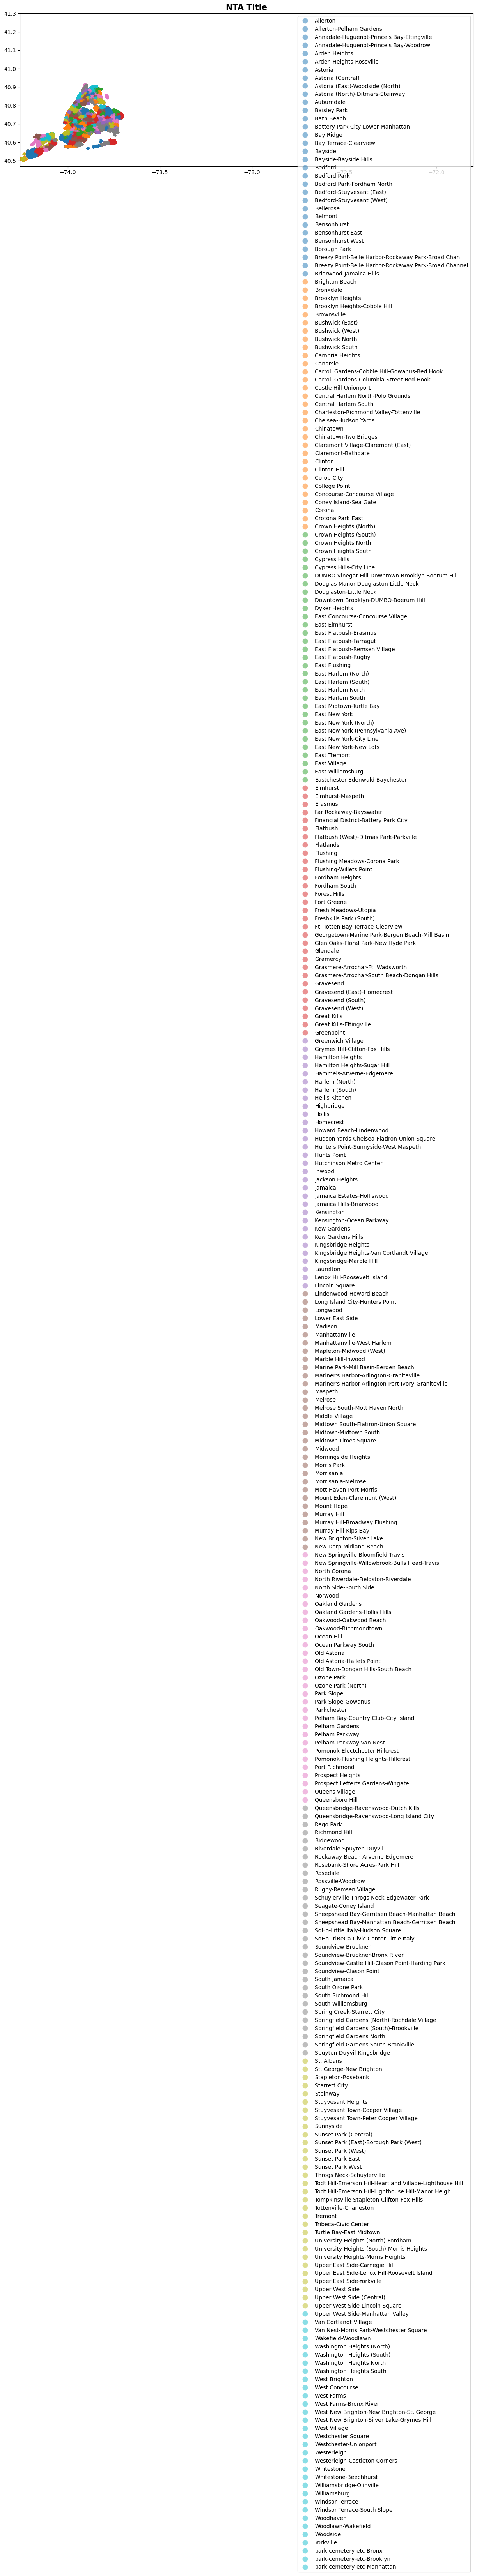

In [34]:
# test plot from the geopandas data - DEBUG - change mapping
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df.plot(column='NTA', ax=ax, alpha=0.5,
           legend=True, markersize=10)
# graph title
plt.title('NTA Title', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display
plt.xlim(-74.26,-71.8)
plt.ylim(40.47,41.3)

#show map
plt.show()

KeyboardInterrupt: 

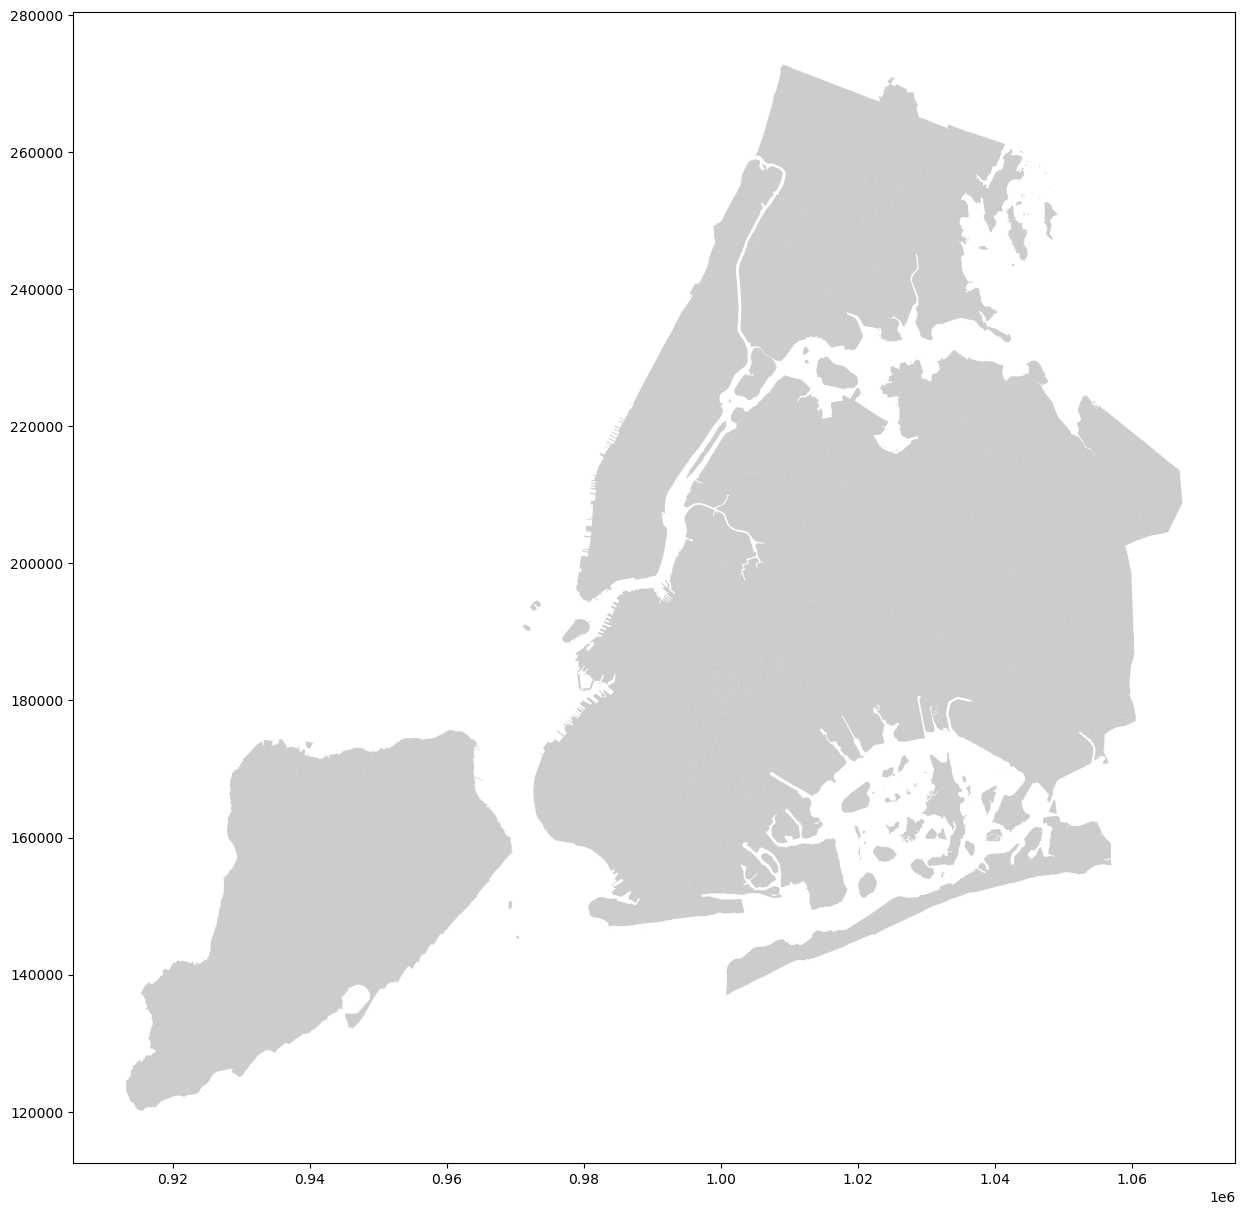

In [45]:
# plot rentimpairing category
fig, ax = plt.subplots(figsize=(15,15))
censusTract_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df[geo_df['RentImpairing'] == 'N'].plot(ax=ax,
                                             markersize=10,
                                             color='blue', 
                                             marker='o',
                                             label='N')
geo_df[geo_df['RentImpairing'] == 'Y'].plot(ax=ax, 
                                             markersize = 10,
                                             color = 'red',
                                              marker='^',
                                            label='Y')
plt.legend(prop={'size':15})
plt.title('Rent Impairing', fontsize=15, fontweight='bold')

#latitude and longitude boundaries for map display - DEBUG
plt.xlim(-74.26,-71.8)
plt.ylim(40.47,41.3)

#show map
plt.show()

In [26]:
# visualizations - Question 1: Which boroughs do violations occur in the most overall?
df2['Borough'].value_counts()

BROOKLYN         3378821
BRONX            2393325
MANHATTAN        1716994
QUEENS           1006260
STATEN ISLAND     136585
Name: Borough, dtype: int64

[Text(0, 0, '3378821'),
 Text(0, 0, '2393325'),
 Text(0, 0, '1716994'),
 Text(0, 0, '1006260'),
 Text(0, 0, '136585')]

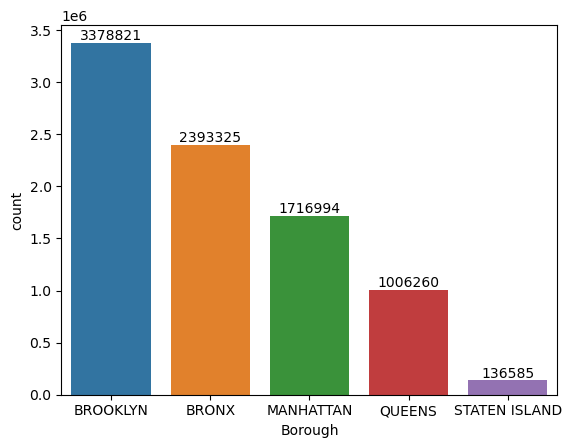

In [44]:
ax = sns.countplot(data=df2, x='Borough', order=df['Borough'].value_counts(ascending=False).index)
values = df2['Borough'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values)
# add legend, add title

In [28]:
# visualizations - Question 2: Which neighborhood (NTA) has the most violations?
df2['NTA'].value_counts()

Crown Heights North                     266435
Flatbush                                225771
Washington Heights South                186954
Prospect Lefferts Gardens-Wingate       168255
Mount Hope                              162147
                                         ...  
Stuyvesant Town-Peter Cooper Village        31
Hutchinson Metro Center                     17
Flushing Meadows-Corona Park                 4
park-cemetery-etc-Manhattan                  3
Freshkills Park (South)                      1
Name: NTA, Length: 313, dtype: int64

<Axes: xlabel='NTA', ylabel='NTA'>

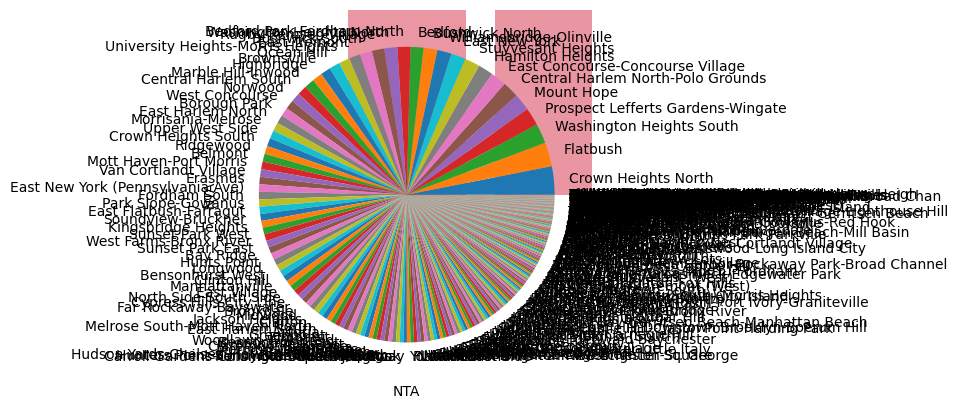

In [29]:
# debug - change visualization format
sns.countplot(data=df2,x='NTA')
df2.NTA.value_counts().plot(kind='pie')

In [37]:
# visualizations - Question 4: Which class of violation occurs the most?
df2['Class'].value_counts()

B    4218104
A    1938640
C    1806480
I     668761
Name: Class, dtype: int64

<Axes: title={'center': 'Class of Violation'}, ylabel='Class'>

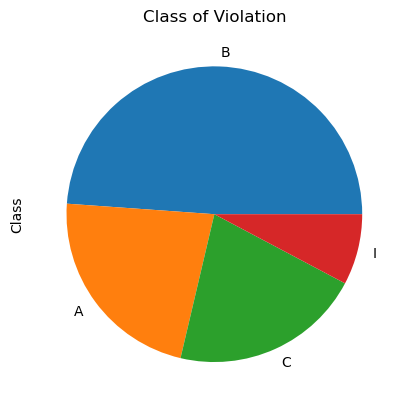

In [41]:
df2.Class.value_counts().plot(kind='pie',title='Class of Violation')
# DEBUG
#values = df2['Class'].value_counts().values
#ax2.bar_label(container=ax.containers[0], labels = values)

In [ ]:
# visualizations - Question 3: What day did the most violations occur?